In [14]:
# Notebook: Venn Processes
# Description: Notebook contains analysis of overlapping affected processes between study groups.

In [15]:
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [16]:
import pandas as pd

import matplotlib.pyplot as plt
from venn import venn

In [5]:
# Reactome -> load results from methylGSE

In [17]:
nonCoV = set(
    pd.read_csv("../FA/NonCov_report_Reactome_.csv", index_col=0)["Description"]
)

covSpain = set(
    pd.read_csv("../FA/CoVSpain_report_Reactome_.csv", index_col=0)["Description"]
)

covUSA = set(
    pd.read_csv("../FA/USACoV_report_Reactome_.csv", index_col=0)["Description"]
)

covPL = set(
    pd.read_csv("../FA/PUMCoV_report_Reactome_.csv", index_col=0)["Description"]
)

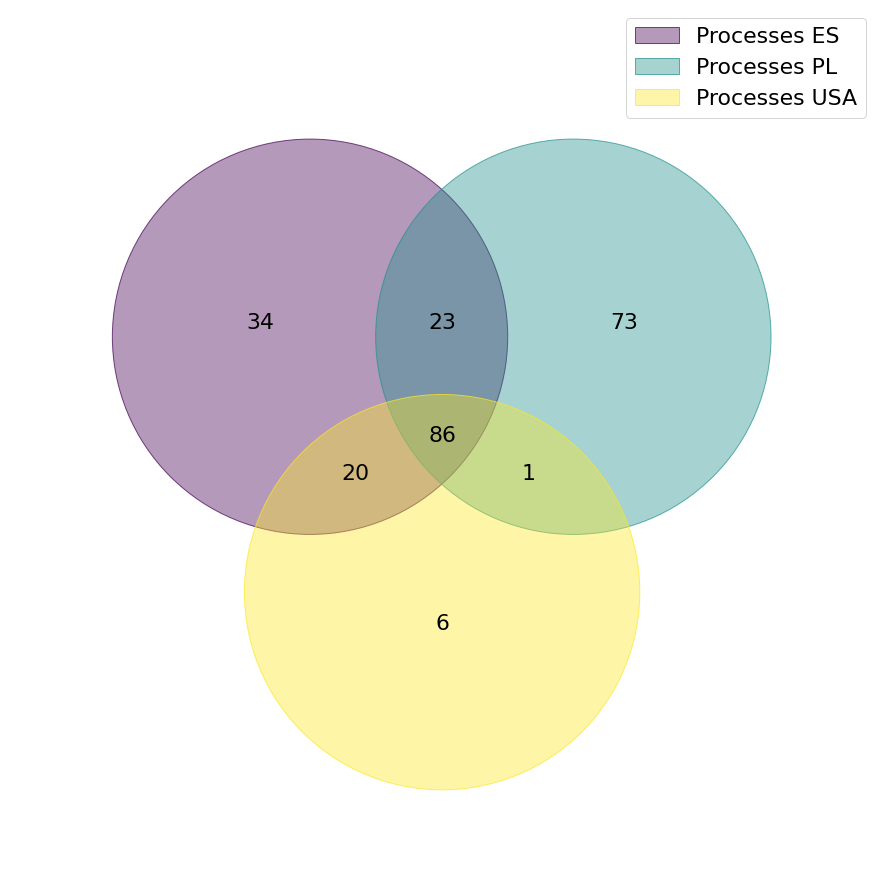

In [18]:
fig = venn(
    {
        "Processes ES": covSpain,
        "Processes PL": covPL,
        "Processes USA": covUSA,
    },
    figsize=(16, 16),
    fontsize=22,
)

fig.figure.savefig("../Plots/VennProcessReactome.jpg")

In [19]:
# Export intersection

In [20]:
intersection = pd.DataFrame(set.intersection(covSpain, covPL, covUSA))
intersection

,0
0,Homo sapiens: Cdc20:Phospho-APC/C mediated deg...
1,Homo sapiens: Signaling by ROBO receptors
2,Homo sapiens: RHO GTPase Effectors
3,Homo sapiens: Vif-mediated degradation of APOB...
4,Homo sapiens: Host Interactions of HIV factors
...,...
81,Homo sapiens: Hh mutants that don't undergo au...
82,Homo sapiens: Transcriptional regulation by RUNX3
83,Homo sapiens: Mitotic G1-G1/S phases
84,Homo sapiens: Hedgehog 'off' state


In [21]:
pd.DataFrame(intersection).to_excel("../FA/Intersection/ReactomeIntersection.xls")